<a href="https://colab.research.google.com/github/Askoye/Recruitment-Database-Case-Study/blob/main/Yoco_Recruitment_Database_Case_Study_by_Ted_Askoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recruitment Database Case Study


### a.) Specifying the data analytic question

  > The research problem is to figure out how we can focus insights on the following roles to help the People Team identify problems and analyse the data quantitatively with the process and find potential areas of improvement.

  The roles are
- Head of Customer Success
- Finance Data Analyst
- Senior Front End Engineer Generic
- Supply Chain Analyst. 

### b.) Defining the metric for success
  >Our metric of success will be demonstrated by our ability to show the accurate and helpful insights pertaining to the job roles and provide recommendations on areas of improvement.

### c.) Understanding the context

Yoco is growing quickly and the business priority is to recruit high quality candidates as quickly as possible.

Some roles are harder to hire than others (i.e. more technical, specialist roles take longer to fill), the recruitment team is focusing its effort on the harder to hire roles as they will not close without ongoing support.

The challenge is that our recruitment process has not been analysed quantitatively to identify problems with the process and potential areas of improvement.

Although some of the roles have timeline targets of when to complete a hiring process, the granular steps of the process are not surfaced and visibly tracked. This means that it's difficult to monitor progress towards our goals and provide feedback to the people leadership team.

The Greenhouse system is used, however, no one has actively reviewed the data it produces and there is no data quality process in place. However, an ETL tool has been used to extract data from this system and create a dataset which can be analysed

Every application to a role creates an entry in the Greenhouse which is provided below, as the data dictionary. Although the data contains all applications and roles created from 2020, the recruitment team have asked you to focus your insights only on the 4 roles: Head of Customer Success, Finance Data Analyst, Senior Front End Engineer Generic, Supply Chain Analyst. 



### d.) Recording the Experimental Design

  > Here is the breakdown of the process:
   1. Started with loading data, and previewing it.
   2. Explored the data a bit to understand the kind of dataset we have
   3. Validated the data from outside source
   4. Cleaned the data
   5. Perfomed Univariate Analysis
   6. Perfomed Bivariate Analysis
   7. Interpreted Analysis and formed a conclusion
   8. Recommendantions arrived at the conclusion and challenge the dataset


### Loading the Dataset




The dataset we will use contains information about the Yoco Recruitement Database Case Study.


*   Dataset link for download or access: [Link]('https://drive.google.com/file/d/1qnALxZ6gzLqVbyi_w22vTSVWDLuXgcLK/view?usp=sharing')

*   Data Dictionary link for download or access: [Link]('https://drive.google.com/file/d/1wB-Lp6bUsHHk3aP0qreZPCHsiEImgaq2/view?usp=sharing')




In [ ]:
# Loading and Previewing the CSV

# Importing our libraries
import pandas as pd # To put data in tabular form of rows and columns.
import numpy as np # To perform a number of mathematical operations on arrays
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Yoco/recruiting_database_case_study.csv')

df

,application_id,application_created_at,application_status,job_id,current_application_stage,job_name
0,201113071,2021-05-31 04:40:00.586000,active,1822856.0,Application Review,Group Product Manager
1,201101004,2021-05-30 23:50:03.469000,active,1822856.0,Application Review,Group Product Manager
2,201076957,2021-05-30 15:16:02.595000,active,1822856.0,Application Review,Group Product Manager
3,201072203,2021-05-30 13:23:01.666000,active,1828701.0,Application Review,UX Writer - Product
4,201068354,2021-05-30 11:21:01.754000,active,1828636.0,Application Review,Product Design Manager (UX&UI)
...,...,...,...,...,...,...
5983,146174654,2020-01-02 02:06:03.210000,rejected,1229652.0,Application Review,Supply Chain Analyst
5984,146174516,2020-01-02 02:04:01.617000,rejected,1229652.0,Application Review,Supply Chain Analyst
5985,146161268,2020-01-01 21:46:04.280000,rejected,1229666.0,Face to Face,Revenue Analyst
5986,146150544,2020-01-01 18:10:03.983000,rejected,1127885.0,Application Review,Customer Insight Specialist


Our database has 5988 rows and 6 columns

In [ ]:
# Set to display the full information within a column

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [ ]:
# Data Dictionary information regarding the recruitment database.

data_dict = pd.read_csv('/content/drive/MyDrive/Yoco/data_dictionary.csv')

print(data_dict)

                       Field                                                                                Description
0             application_id           The unique identifier for the application (a single candidate for a single job).
1     application_created_at                                    The UTC date time at which the application was created.
2         application_status          Whether the application is currently being processed, or has received an outcome.
3                     job_id                      The unique identifier for the job that the candidate has applied for.
4  current_application_stage  The stage of the application (note different jobs can have different application stages).
5                   job_name                                                     The name of the job being applied for.


In [ ]:
# Getting to know more about the dataset by accessing its information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988 entries, 0 to 5987
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             5988 non-null   int64  
 1   application_created_at     5988 non-null   object 
 2   application_status         5988 non-null   object 
 3   job_id                     5851 non-null   float64
 4   current_application_stage  5851 non-null   object 
 5   job_name                   5851 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 280.8+ KB


Some of the features such as;
'application_created_at,application_status,current_application_stage and job_id' have data types that don't correspond to their true nature of 'date/time and category data types respectively

## Data Preparation and Cleaning

In [ ]:
# Consistency
# Checking for unique values for each column
for column in df.columns:
  print('\n')
  print( df[column].nunique())
  print(df[column].unique())



5988
[201113071 201101004 201076957 ... 146161268 146150544 146137661]


5986
['2021-05-31 04:40:00.586000' '2021-05-30 23:50:03.469000'
 '2021-05-30 15:16:02.595000' ... '2020-01-01 21:46:04.280000'
 '2020-01-01 18:10:03.983000' '2020-01-01 09:30:00.691000']


4
['active' 'rejected' 'converted' 'hired']


113
[1822856. 1828701. 1828636. 1810989. 1814471. 1730731. 1721356. 1819410.
 1833559. 1773303. 1791578. 1826150. 1826174. 1730696.      nan 1799919.
 1764998. 1768716. 1773497. 1553791. 1671974. 1721470. 1557934. 1799751.
 1814262. 1419928. 1739664. 1826140. 1792726. 1827117. 1490070. 1760355.
 1760356. 1127885. 1815883. 1744688. 1755387. 1557936. 1733629. 1733614.
 1650990. 1562421. 1487978. 1644205. 1484071. 1583059. 1643942. 1462356.
 1221044. 1553559. 1553536. 1150245. 1518935. 1543419. 1562436. 1497118.
 1040326. 1121334. 1188855. 1274504. 1268899. 1239515.  539354. 1292103.
 1302363. 1285296. 1268908. 1296925. 1282719. 1319034. 1303067. 1308063.
 1288245. 1285372. 1284231. 1

In [ ]:
# Uniformity
# To align the data in certain columns in our dataset to fill in empty spaces and removing unnecessary symbols for uniformity 
# The columns are namely: job_name & current_application_stage

df['job_name'] = df['job_name'].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df['current_application_stage'] = df['current_application_stage'].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
# Checking if the changes were effected

print(df['job_name'].unique())
print('*'*120)
print(df['current_application_stage'].unique())

# The changes were effected as seen below

['group_product_manager' 'ux_writer_-_product'
 'product_design_manager_ux&ui' 'anti-financial_crime_lead'
 'senior_data_modelling_specialist'
 'user_researcher_quantitative_&_qualitative'
 'senior_front_end_engineer_generic' 'senior_customer_success_trainer'
 'principal_back_end_engineer_in-person' 'product_marketing_manager'
 'senior_marketing_manager' 'recruitment_coordinator'
 'people_data_analyst' 'lending_product_manager' nan
 'data_analytics_lead_customer_operations' 'technical_recruiter'
 'engineering_lead_-_new_markets' 'key_accounts_manager'
 'growth_art_director' 'senior_product_designer,_ux_or_ui'
 'senior_back_end_engineer_generic' 'engineering_manager'
 'customer_success_consultant' 'salesforce_developer' 'ux_design_lead'
 'devops_engineer' 'talent_sourcer' 'generalist_recruiter'
 'recruitment_manager_/_head_of_ta' 'tech_lead_app_team'
 'senior_software_developer_-_ios' 'senior_software_developer_-_android'
 'customer_insight_specialist' 'growth_talent_pipeline'
 'finance

In [ ]:
# Uniformity

# Converting some specific columns to appropriate datatypes (strings to category)
df = df.astype({"current_application_stage": 'category' , "application_status": 'category', 
                "job_id": 'category', "application_status": 'category',"application_id": str})



In [ ]:
# String to Date/Time format
df["application_created_at"] = pd.to_datetime(df["application_created_at"])


In [ ]:
# Checking if the columns have the appropriate data types
df.dtypes

# The changes were effected.

application_id                       object
application_created_at       datetime64[ns]
application_status                 category
job_id                             category
current_application_stage          category
job_name                             object
dtype: object

In [ ]:
# Grouping similar stages in the current_application_stage by renaming them to their most similar traits.

df['current_application_stage'] = df['current_application_stage'].replace({'case_study': 'technical_interview/case_study', 
                                                                           'technical_interview': 'technical_interview/case_study', 
                                                                           'remote_assessment': 'technical_interview/case_study', 
                                                                           'phone_interview_2': 'phone_interview','typeform': 'typeform_stage', 
                                                                           'team_fit': 'team_&_culture_fit_interview', 'panel_interview': 'final_interview',
                                                                           'meet_and_greet': 'final_interview', 'face_to_face': 'final_interview', 
                                                                           'shortlist': 'shortlisting', 'preliminary_phone_screen': 'shortlisting',
                                                                           'the_who_interview': 'competency_based_interview', 'spark_hire': 'competency_based_interview', 
                                                                           'the_focused_interview': 'competency_based_interview',
                                                                           'team_interview': 'team_&_culture_fit_interview', 'team_fit_interview': 'team_&_culture_fit_interview', 
                                                                           'culture_interview': 'team_&_culture_fit_interview','case_study_interview': 'team_&_culture_fit_interview',
                                                                           'typeform_stage': 'shortlisting','typeform_screening': 'shortlisting','preliminary_screening': 'application_review'})


In [ ]:
# Checking if the changes were effected

print(df['job_name'].unique())
print('*'*120)
print(df['current_application_stage'].unique())


['group_product_manager' 'ux_writer_-_product'
 'product_design_manager_ux&ui' 'anti-financial_crime_lead'
 'senior_data_modelling_specialist'
 'user_researcher_quantitative_&_qualitative'
 'senior_front_end_engineer_generic' 'senior_customer_success_trainer'
 'principal_back_end_engineer_in-person' 'product_marketing_manager'
 'senior_marketing_manager' 'recruitment_coordinator'
 'people_data_analyst' 'lending_product_manager' nan
 'data_analytics_lead_customer_operations' 'technical_recruiter'
 'engineering_lead_-_new_markets' 'key_accounts_manager'
 'growth_art_director' 'senior_product_designer,_ux_or_ui'
 'senior_back_end_engineer_generic' 'engineering_manager'
 'customer_success_consultant' 'salesforce_developer' 'ux_design_lead'
 'devops_engineer' 'talent_sourcer' 'generalist_recruiter'
 'recruitment_manager_/_head_of_ta' 'tech_lead_app_team'
 'senior_software_developer_-_ios' 'senior_software_developer_-_android'
 'customer_insight_specialist' 'growth_talent_pipeline'
 'finance

In [ ]:
# Completeness
# Checking for null values

df.isnull().sum()

# some of our records from job_id, current_application_stage and job_name have null values, 
# though not as many from a total records of 5988

application_id                 0
application_created_at         0
application_status             0
job_id                       137
current_application_stage    137
job_name                     137
dtype: int64

In [ ]:
# How many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

application_id               0.000000
application_created_at       0.000000
application_status           0.000000
job_id                       0.381318
current_application_stage    0.381318
job_name                     0.381318
dtype: float64

The missing data in the three columns (current_application_stage, job_name and job_id) have an overall presence of 0.38%. 
Due to its small size, we shall drop them as it would pose no significant threat to our dataset. 

In [ ]:
# Dropping all rows with missing values

df = df.dropna()

In [ ]:
# Checking our null values have been dropped
df.isnull().sum()

# All null values dropped

application_id               0
application_created_at       0
application_status           0
job_id                       0
current_application_stage    0
job_name                     0
dtype: int64

In [ ]:
# Consistency
# Checking for duplicates
df.duplicated().any()

False

In [ ]:
duplicateRows = df[df.duplicated()]
duplicateRows.count()

application_id               0
application_created_at       0
application_status           0
job_id                       0
current_application_stage    0
job_name                     0
dtype: int64

No duplicates present


In [ ]:
# Confirming we have input the appropriate data types 
df.dtypes


application_id                       object
application_created_at       datetime64[ns]
application_status                 category
job_id                             category
current_application_stage            object
job_name                             object
dtype: object

## Data Exploration (EDA)

- Univariate Analysis.

In [ ]:
# Finding and viewing the top 20 jobs based on applications 
df["job_name"].value_counts()
job_name_count = df["job_name"].value_counts()
top_jobs = job_name_count[:20]
top_jobs

head_of_customer_success                      358
supply_chain_analyst                          345
key_accounts_manager                          296
growth_art_director                           264
user_researcher_quantitative_&_qualitative    247
outbound_sales_representative                 224
online_community_coordinator                  175
2021_expansion_associate                      172
product_lead                                  146
head_of_risk_&_compliance                     142
customer_support_consultant_2021              139
customer_success_consultant                   135
copywriter:_marketing_&_communications        131
revenue_analyst                               126
product_analytics_lead                        108
growth_product_manager                        107
senior_customer_success_trainer               101
ux_design_lead                                 98
retail_marketing_specialist                    95
talent_acquisition_lead                        93


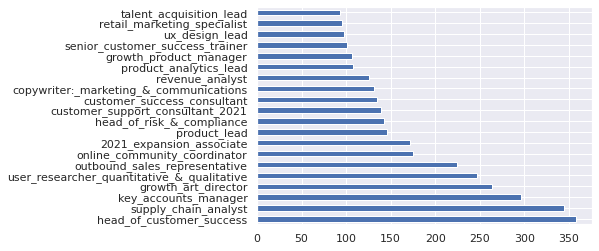

In [ ]:
# Plotting it against a bar chart
top_jobs.plot(kind='barh')

In [ ]:
# Finding and viewing total number of applications reviewed based on overall applications status
df["application_status"].value_counts()
job_status_count = df["application_status"].value_counts()
status_count = job_status_count[:10]
status_count

rejected     5320
active        531
hired           0
converted       0
Name: application_status, dtype: int64

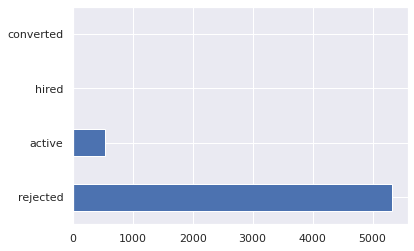

In [ ]:
# Plotting it against a bar chart
status_count.plot(kind='barh')

In [ ]:
# Finding and viewing total number of applications reviewed based on overall current applications stages

df["current_application_stage"].value_counts()
applictaion_stage_count = df["current_application_stage"].value_counts()
stage_count = applictaion_stage_count[:30]
stage_count

application_review                5039
shortlisting                       347
final_interview                    231
technical_interview/case_study     110
competency_based_interview          53
team_&_culture_fit_interview        22
offer                               21
reference_check                     14
phone_interview                     10
typeform_stage                       4
Name: current_application_stage, dtype: int64

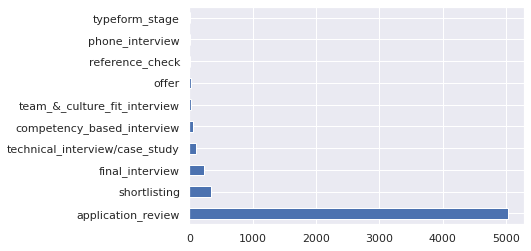

In [ ]:
# Plotting it against a bar chart
stage_count.plot(kind='barh')

- Bivariate Analysis

In [ ]:
# Finding and viewing total number of applications reviewed based on their job names

job_count = df.groupby('job_name')['application_status'].value_counts()
job_count.head(10)

job_name                                     application_status
2021_expansion_associate                     rejected              172
account_manager                              rejected               25
anti-financial_crime_lead                    rejected               44
                                             active                 20
art_director/senior_designer                 rejected                2
associate_software_engineer                  rejected                2
backend_software_engineer_-_first_mile_team  rejected               14
                                             active                  1
business_analyst_regional_expansion          rejected               21
business_development_manager                 rejected               28
Name: application_status, dtype: int64

In [ ]:
# Finding and viewing total number of applications per stage based on their job names

app_count = df.groupby('current_application_stage')['job_name'].value_counts()
app_count.head(20)

current_application_stage  job_name                                  
application_review         head_of_customer_success                      345
                           supply_chain_analyst                          327
                           key_accounts_manager                          282
                           growth_art_director                           247
                           user_researcher_quantitative_&_qualitative    222
                           outbound_sales_representative                 219
                           online_community_coordinator                  167
                           product_lead                                  142
                           head_of_risk_&_compliance                     137
                           copywriter:_marketing_&_communications        129
                           2021_expansion_associate                      128
                           customer_support_consultant_2021              101
      

In [ ]:
# Finding and viewing total number of applications per stage based on their application status.

df.groupby(['application_status', 'current_application_stage']).size()


application_status  current_application_stage     
active              application_review                 338
                    competency_based_interview           9
                    final_interview                     70
                    offer                               17
                    phone_interview                      0
                    reference_check                     12
                    shortlisting                        55
                    team_&_culture_fit_interview         1
                    technical_interview/case_study      25
                    typeform_stage                       4
converted           application_review                   0
                    competency_based_interview           0
                    final_interview                      0
                    offer                                0
                    phone_interview                      0
                    reference_check                      0
     

In [ ]:
# Saving the dataset for future presavation of data that could be inmportant or improved in the future.
df.to_csv(r'clean_yoco_df.csv', index = False)

You can find the dataset [here](https://https://drive.google.com/file/d/1EEhI4jR_Nm0fs0McA3wnaJlrTMEZzMo_/view?usp=sharing).

## Featured columns


From the selected job titles i.e - 

- 'finance_data_analyst',
- 'supply_chain_analyst'
- 'senior_front_end_engineer_generic'
- 'head_of_customer_success'

We have a resultant 822 records

In [ ]:
selected_rows = ['finance_data_analyst','supply_chain_analyst','senior_front_end_engineer_generic','head_of_customer_success']
  
# selecting rows based on condition
recruitment_df = df.loc[df['job_name'].isin(selected_rows)]
  
recruitment_df

,application_id,application_created_at,application_status,job_id,current_application_stage,job_name
21,200955335,2021-05-28 16:28:18.596,active,1721356.0,final_interview,senior_front_end_engineer_generic
568,198621422,2021-05-09 14:34:01.926,active,1721356.0,application_review,senior_front_end_engineer_generic
692,197951596,2021-05-03 19:27:06.109,active,1721356.0,application_review,senior_front_end_engineer_generic
748,197642169,2021-04-30 11:10:01.197,active,1721356.0,application_review,senior_front_end_engineer_generic
921,196659251,2021-04-22 11:52:00.786,active,1721356.0,application_review,senior_front_end_engineer_generic
956,196557545,2021-04-21 17:04:02.621,rejected,1744688.0,application_review,finance_data_analyst
964,196523015,2021-04-21 12:25:01.187,active,1721356.0,application_review,senior_front_end_engineer_generic
978,196515674,2021-04-21 10:27:02.580,rejected,1744688.0,application_review,finance_data_analyst
987,196508375,2021-04-21 08:16:01.995,rejected,1744688.0,application_review,finance_data_analyst
990,196504427,2021-04-21 07:04:00.986,rejected,1744688.0,application_review,finance_data_analyst


EDA.
- Univariate Analysis

In [ ]:
# Total number of applications received for each of the listed jobs.
recruitment_df["job_name"].value_counts()
rec_job_name_count = recruitment_df["job_name"].value_counts()
rec_top_jobs = rec_job_name_count[:10]
rec_top_jobs

head_of_customer_success             358
supply_chain_analyst                 345
finance_data_analyst                  86
senior_front_end_engineer_generic     33
Name: job_name, dtype: int64

We found that out of the listed jobs we were required to look into, the position with the Highest applications was Head of Customer Success with 358 applications, followed by Supply Chain Analyst with 345, Finance Data Analyst with 86 and Senior Front End Engineer Generic with 33 applications.

In [ ]:
# Total number of applications received for each of the listed stages.

recruitment_df["current_application_stage"].value_counts()
rec_applictaion_stage_count = recruitment_df["current_application_stage"].value_counts()
rec_stage_count = rec_applictaion_stage_count[:20]
rec_stage_count

application_review                770
shortlisting                       26
technical_interview/case_study     12
final_interview                    11
competency_based_interview          2
reference_check                     1
Name: current_application_stage, dtype: int64

We found that out of the listed jobs we were required to look into, the application stage with the most applications was the application review stage with 770 applicants, followed by Shortlisting with 26, Technical Interview/Case Study with 12, Final Interview stage with 11 applicant, with the Competency based interview and reference check with 2 & 1 applicants respectively.

In [ ]:
# Total number of status reports received based on applications for each of the listed jobs.

recruitment_df["application_status"].value_counts()
rec_application_status_count = recruitment_df["application_status"].value_counts()
rec_status_count = rec_application_status_count[:10]
rec_status_count

rejected     792
active        30
hired          0
converted      0
Name: application_status, dtype: int64

Out of the 822 applications received from the listed jobs, 792 candidates were rejected as they progressed through the candidate funnel. 30 applicants still have active applications as none have been hired or converted.

In [ ]:
(rec_top_jobs/

In [ ]:
# Finding and viewing total number of applications based on their job names

recruitment_df.groupby('job_name').size()

job_name
finance_data_analyst                  86
head_of_customer_success             358
senior_front_end_engineer_generic     33
supply_chain_analyst                 345
dtype: int64

In [ ]:
# Finding and viewing total number of applications per stage based on their job names

recruitment_df.groupby('job_name')['application_status'].value_counts()

job_name                           application_status
finance_data_analyst               rejected               86
head_of_customer_success           rejected              355
                                   active                  3
senior_front_end_engineer_generic  active                 25
                                   rejected                8
supply_chain_analyst               rejected              343
                                   active                  2
Name: application_status, dtype: int64

In [ ]:
# Finding and viewing total number of applications per stage based on their job names

recruitment_df.groupby('job_name')['current_application_stage'].value_counts()

job_name                           current_application_stage     
finance_data_analyst               application_review                 78
                                   final_interview                     7
                                   technical_interview/case_study      1
head_of_customer_success           application_review                345
                                   shortlisting                       13
senior_front_end_engineer_generic  application_review                 20
                                   final_interview                     4
                                   shortlisting                        4
                                   technical_interview/case_study      4
                                   reference_check                     1
supply_chain_analyst               application_review                327
                                   shortlisting                        9
                                   technical_interview/cas

In [ ]:
job_stage_count = recruitment_df.groupby(['job_name', 'application_status', 'current_application_stage']).size()
job_stage_count

job_name                           application_status  current_application_stage     
finance_data_analyst               active              application_review                  0
                                                       competency_based_interview          0
                                                       final_interview                     0
                                                       reference_check                     0
                                                       shortlisting                        0
                                                       technical_interview/case_study      0
                                   converted           application_review                  0
                                                       competency_based_interview          0
                                                       final_interview                     0
                                                       reference_check       

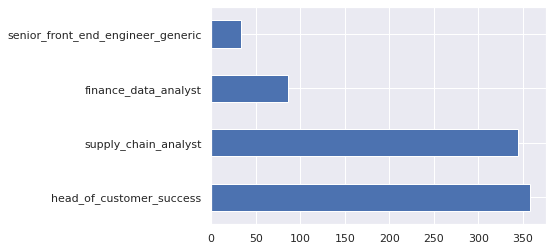

In [ ]:
rec_top_jobs.plot(kind='barh')

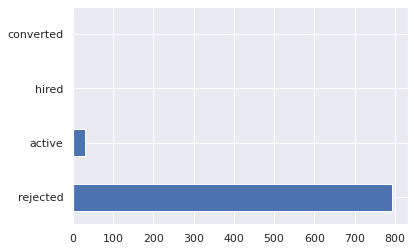

In [ ]:
rec_status_count.plot(kind='barh')

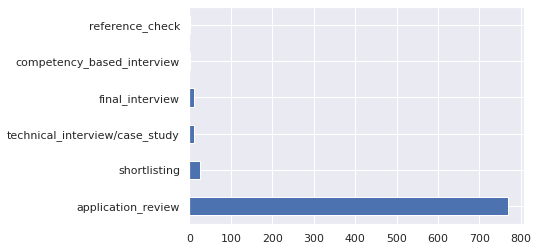

In [ ]:
rec_stage_count.plot(kind='barh')

**Insights from the Recruitement Data**


From the listed jobs, we were able to review the following in terms of application status and their respective stages

*Finance Data Analyst*
- The Finance Data Analyst position received a total of 86 applications.

- From the 86 applications, all 86 of the applicants were rejected

- Based on their application stages, 78 applicants had made it to the Application Review stage, 1 applicant in the Technical Interview/Case Study stage and 7 made it to the Final interview.

- There are no active applications.

- The rejected applications were 78 in the application review stage, 1 in the Technical/Interview stage and 7 at the Final Interview stage.




*Head of Customer Success*
- The Head of Customer Success position received a total of 358 applications.

- From the 358 applications, 355 of the applicants were rejected while 3 applicants still have active applications.

- Based on their application stages, 345 applicants had made it to the Application Review stage, and 13 applicants were shortlisted.

- The active applications were 2 in the Shortlist Stage and 1 in the application reviews.

- The rejected applications were 344 in the application review stage and 11 at the Shortlisting stage.




*Senior Front End Engineer Generic*
- The Senior Front End Engineer Generic position received a total of 33 applications.

- From the 33 applications, 8 of the applicants were rejected while 25 applicants still have active applications.

- Based on their application stages, 20 applicants had made it to the Application Review stage, 4 applicants were Shortlisted, 4 applicants in the Technical Interview/Case Study stage, 1 applicant made it to the Reference Check and 4 made it to the Final interview.

- The active applications were 14 in the Application Review stage, 3 in the Shortlist Stage 3 in the Technical Interview/Case Study stage,1 in the Reference Check Stage and 4 in the Final Interview stage.

- The rejected applications were 6 in the application review stage, 1 in the Technical Interview/Case Study stage and 1 at the Shortlisting stage.




*Supply Chain Analyst*
- The Supply Chain Analyst position received a total of 345 applications.

- From the 345 applications, 343 of the applicants were rejected while 2 applicants still have active applications.

- Based on their application stages, 327 applicants had made it to the Application Review stage, 9 applicants were Shortlisted, 7 applicants in the Technical Interview/Case Study stage and 2 applicants in the Competency-Based Interview.

- The active applications were 1 at the Competency Based Interview and 1 in the Application Review Stage.

- The rejected applications were 327 in the application review stage, 6 at the Technical Interview/Case Study Stage, 1 at the Competency Based Interview, and 9 at the Shortlisting stage.




In [ ]:
# Saving the featured variable dataset for future presavation of data that could be inmportant or improved in the future.
recruitment_df.to_csv(r'clean_feature_yoco_df.csv', index = False)

## Qualified Candidates


We took this assumption that the qualified candidates did not have their applications rejected and there not in the application review stage.

In [ ]:
qualified_df = recruitment_df[(recruitment_df['application_status'] != 'rejected') & (recruitment_df['current_application_stage'] != 'application_review')]
qualified_df

,application_id,application_created_at,application_status,job_id,current_application_stage,job_name
21,200955335,2021-05-28 16:28:18.596,active,1721356.0,final_interview,senior_front_end_engineer_generic
1088,195781310,2021-04-14 21:48:01.613,active,1721356.0,final_interview,senior_front_end_engineer_generic
1400,193527865,2021-03-26 07:52:30.210,active,1721356.0,technical_interview/case_study,senior_front_end_engineer_generic
1639,191612524,2021-03-12 09:30:15.155,active,1721356.0,final_interview,senior_front_end_engineer_generic
1835,190787522,2021-03-05 13:37:48.586,active,1721356.0,technical_interview/case_study,senior_front_end_engineer_generic
1879,190481902,2021-03-03 12:38:50.281,active,1721356.0,final_interview,senior_front_end_engineer_generic
2032,189582819,2021-02-24 07:37:02.225,active,1721356.0,shortlisting,senior_front_end_engineer_generic
2091,189128083,2021-02-20 18:09:02.390,active,1721356.0,shortlisting,senior_front_end_engineer_generic
2109,188938054,2021-02-18 21:52:06.887,active,1721356.0,technical_interview/case_study,senior_front_end_engineer_generic
2145,188772253,2021-02-17 19:46:10.398,active,1721356.0,shortlisting,senior_front_end_engineer_generic


In [ ]:
# Total number of applications received for each of the listed jobs.

qualified_df["job_name"].value_counts()
qua_job_name_count = qualified_df["job_name"].value_counts()
qua_top_jobs = qua_job_name_count[:10]
qua_top_jobs

senior_front_end_engineer_generic    11
head_of_customer_success              2
supply_chain_analyst                  2
Name: job_name, dtype: int64

In [ ]:
# Total number of applications received for each of the listed stages.

qualified_df["current_application_stage"].value_counts()
qua_application_stage_count = qualified_df["current_application_stage"].value_counts()
qua_stage_count = qua_application_stage_count[:10]
qua_stage_count

shortlisting                      5
final_interview                   4
technical_interview/case_study    4
reference_check                   1
competency_based_interview        1
Name: current_application_stage, dtype: int64

In [ ]:
# Total number of status reports received based on applications for each of the listed jobs.

qualified_df["application_status"].value_counts()
qua_app_status_count = qualified_df["application_status"].value_counts()
qua_status_count = qua_app_status_count[:10]
qua_status_count

active       15
rejected      0
hired         0
converted     0
Name: application_status, dtype: int64

In [ ]:
qua_job_stage = qualified_df.groupby('job_name')['current_application_stage'].value_counts()
qua_job_stage


job_name                           current_application_stage     
head_of_customer_success           shortlisting                      2
senior_front_end_engineer_generic  final_interview                   4
                                   shortlisting                      3
                                   technical_interview/case_study    3
                                   reference_check                   1
supply_chain_analyst               competency_based_interview        1
                                   technical_interview/case_study    1
Name: current_application_stage, dtype: int64

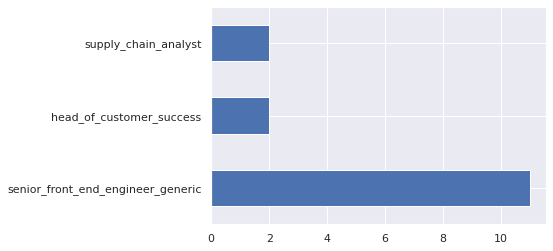

In [ ]:
qua_top_jobs.plot(kind='barh')

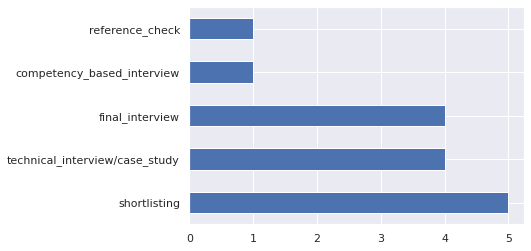

In [ ]:
qua_stage_count.plot(kind='barh')

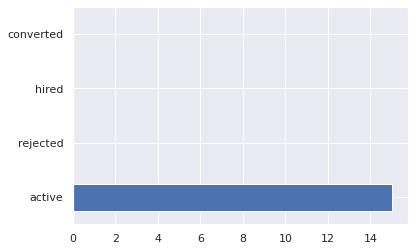

In [ ]:
qua_status_count.plot(kind='barh')

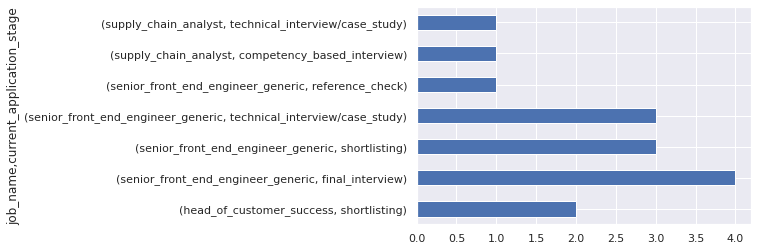

In [ ]:
qua_job_stage.plot(kind='barh')

**Insights from the Qualified Applicants in the Recruitement Dataset**


From the listed jobs, were were able to review the following in terms of application status and their respective stages

(*We took this assumption that the potentially qualified candidates did not have their applications rejected and they are not in the application review stage.*)

The total number of active applications that are still subject to qualification were 15.
The breakdown of the applications are as listed below

*Finance Data Analyst*
- No applicant qualified for this position and there are no active applications as well.


*Head of Customer Success*
- The Head of Customer Success position has 2 active applications.
- The stages at which the applications are at are 2 at the Shortlisting Stage.





*Senior Front End Engineer Generic*
- The Senior Front End Engineer Generic position has 11 active applications
- The stages at which the applications are at are 3 at the Technical Interview/Case Study, 3 were Shortlisted, 1 at the Reference Check stage and 4 made it to the Final Interview Stage.



*Supply Chain Analyst*
- The Supply Chain Analyst position has 2 active applications
- The stages at which the applications are at is 1 at the Competency Based Interview and 1 at the Technical Interview/Case Study Stage.



## **Conclusion**

The data we looked into gave us the following insights.

The dataset had varied syntax problems in regards to data quality and consistency. the dataset had the following compromising issues:

- It had no uniform column names as per required naming convention ie. The columns had various fonts (large and small letters) instead of one similar font (small letters or large letters only. 

- The 'application_status' column had duplicated fields that had the similar meaning. This issue was caused at entry as the varied fields present could have been grouped to similar stage clusters which would enable faster access to view how many candidates were at certain stages of the recruitment process. 

> The majority of the candidates were rejected at the application stage while none made it to the offer stage within the required job descriptions we had looked into. 

> Most applications received were rejected in various stages, the highest stage of rejection is at the Application Review Stage with very few applications still active across the other stages. 

The Head of Customer Success role received the most applications overall with 358 total applications followed by the Supply chain Analyst role with 345, Finance Data Analyst role with 86 and finally the Senior Front End Engineer Generic role with 33 applicants overall.

**Insights from the Recruitement Data**


From the listed jobs, we were able to review the following in terms of application status and their respective stages

*Finance Data Analyst*
- The Finance Data Analyst position received a total of 86 applications.

- From the 86 applications, all 86 of the applicants were rejected

- Based on their application stages, 78 applicants had made it to the Application Review stage, 1 applicant in the Technical Interview/Case Study stage and 7 made it to the Final interview.

- There are no active applications.

- The rejected applications were 78 in the application review stage, 1 in the Technical/Interview stage and 7 at the Final Interview stage.




*Head of Customer Success*
- The Head of Customer Success position received a total of 358 applications.

- From the 358 applications, 355 of the applicants were rejected while 3 applicants still have active applications.

- Based on their application stages, 345 applicants had made it to the Application Review stage, and 13 applicants were shortlisted.

- The active applications were 2 in the Shortlist Stage and 1 in the application reviews.

- The rejected applications were 344 in the application review stage and 11 at the Shortlisting stage.




*Senior Front End Engineer Generic*
- The Senior Front End Engineer Generic position received a total of 33 applications.

- From the 33 applications, 8 of the applicants were rejected while 25 applicants still have active applications.

- Based on their application stages, 20 applicants had made it to the Application Review stage, 4 applicants were Shortlisted, 4 applicants in the Technical Interview/Case Study stage, 1 applicant made it to the Reference Check and 4 made it to the Final interview.

- The active applications were 14 in the Application Review stage, 3 in the Shortlist Stage 3 in the Technical Interview/Case Study stage,1 in the Reference Check Stage and 4 in the Final Interview stage.

- The rejected applications were 6 in the application review stage, 1 in the Technical Interview/Case Study stage and 1 at the Shortlisting stage.




*Supply Chain Analyst*
- The Supply Chain Analyst position received a total of 345 applications.

- From the 345 applications, 343 of the applicants were rejected while 2 applicants still have active applications.

- Based on their application stages, 327 applicants had made it to the Application Review stage, 9 applicants were Shortlisted, 7 applicants in the Technical Interview/Case Study stage and 2 applicants in the Competency-Based Interview.

- The active applications were 1 at the Competency Based Interview and 1 in the Application Review Stage.

- The rejected applications were 327 in the application review stage, 6 at the Technical Interview/Case Study Stage, 1 at the Competency Based Interview, and 9 at the Shortlisting stage.




**Insights from the Qualified Applicants in the Recruitement Dataset**


From the listed jobs, were were able to review the following in terms of application status and their respective stages

(*We took this assumption that the potentially qualified candidates did not have their applications rejected and they are not in the application review stage.*)

The total number of active applications that are still subject to qualification were 15.
The breakdown of the applications are as listed below

*Finance Data Analyst*
- No applicant qualified for this position and there are no active applications as well.


*Head of Customer Success*
- The Head of Customer Success position has 2 active applications.
- The stages at which the applications are at are 2 at the Shortlisting Stage.





*Senior Front End Engineer Generic*
- The Senior Front End Engineer Generic position has 11 active applications
- The stages at which the applications are at are 3 at the Technical Interview/Case Study, 3 were Shortlisted, 1 at the Reference Check stage and 4 made it to the Final Interview Stage.



*Supply Chain Analyst*
- The Supply Chain Analyst position has 2 active applications
- The stages at which the applications are at is 1 at the Competency Based Interview and 1 at the Technical Interview/Case Study Stage.





## **Recommendations**


The recruitment process should be improved by employing the following tactics:

- The applications posted by the recruiters should be reviewed to describe the job description and requirements of the candidate to a very specific individual detail so as to avoid a lot of individuals dropping off at the Applications Review stage. 

- The recruitment funnel processes should also be reviewed to enable increased potential employee retention in the various stages, particularly the final and offer stages as some candidates may be qualified but not make it to the end or complete the whole application process only to fall off at the stages or become converted by other competitors. 

- The 'hard-to-hire' roles could be made simpler to recruit by focusing on the quality of applications ie. For technical roles like the Finance Data Analyst, Supply Chain Analyst and Senior Front End Engineer Generic, the bulk of the applications could be centered on the technical interview/case study stage to funnel top performing candidates. 

- For Senior roles like the Head of Customer Success, the applications could be centered to the competency based interview and one on one to see how applicants would interact with the hiring managers who would assess their behaviours, soft skills and other leadership qualities within the meetings. 

>*Although we have been able to find insights from the dataset, we require further information to be derived, as it would be ideal to add numerical and time data in terms of how many applications were viewed, responded to and accepted or rejected as well as when it happened.*

**This would enable the company know how its performance is in terms of response rate and time and it's potential errors and areas of improvement. It would also lead to the development of KPIs such as:**

1. Qualified candidates per opening - To help identify if the company is reaching the right people from the beginning. If we find our ratio of qualified candidates is low, we might want to think of ways to re-do the job ads and better target our target audience.

2. Recruitment Source Quality - If we're pulling applicants from a number of different sources like various job boards, Linkedin or referrals, we don’t want to waste our time on a source that isn’t giving us high-quality candidates.
Measuring source quality can help us ensure we're only investing in the best sources for th recruitment process and help us build a healthy and reliable pipeline to improve our recruitment process as a whole.

3. Time to Hire - Knowing how much time it takes us to hire a new employee can help you with forecasting and help us shape the entire recruitment strategy. If we know our hiring process typically takes two or three months, we'll know when we need to start our recruitment campaign to get the new hire in at the right time.

4. Cost per hire - Keeping an eye on our cost per hire tells us the average amount of money we spent hiring someone new. It can help you make sure we're not frivolously spending, but it also allows us to budget and plan if their is a big expansion coming up.

5. Offer acceptance rate - Recruitment is a two-way process and sometimes the candidate we give an offer to doesn’t accept the position.
While we can’t expect every candidate to accept, it would be a red flag if most weren’t taking the position. This could be a sign that we've done something wrong in our recruitment process, or that there are larger red flags about our company that we'll want to resolve.

6. Candidate and Hiring Manager satisfaction - Having a great experience when interviewing with a company can leave a lasting impression. If candidates are satisfied, they will be more likely to want to accept an offer. It may even encourage them to apply to another open position if they don’t receive an offer. Just as it is important to measure how satisfied our candidates are with their interviewing and hiring process, we'll want to measure how happy your hiring managers are with the employees we've brought on board.
This can all be done in a survey. For the candidates, a short and simple survey would suffice. asking if they’re having a positive or negative experience during the interview process can usually give you enough information to identify patterns and draw conclusions.
You can measure hiring manager satisfaction with a survey or a short interview. Because these are internal team members, you can get a bit more in-depth with the questions you ask.

____________________________________________________________________
**The Importance of selection may be judged from the following facts:** 
- Procurement of Suitable Candidate is Possible:

Only suitable candidates who are fit for the job are selected from among the prospective
candidates for employment. So, selection is a process by which only desirable candidates are
hired and others are denied the opportunity.

- Good Selection Reduces the Cost of Training and Development:

Proper selection of candidates reduces the cost of training because qualified personnel have better grasping power. They can understand the technique of the work better. Therefore, the organization can develop different training programmes for different persons on the basis of their individual differences, thus reducing the time and cost of training considerably.

- Proper Selection Resolves Personnel Problems:

Proper selection of personnel reduces personnel problems in the organization. Many problems like labour turnover, absenteeism and monotony shall not be experienced in their severity in the
organization. Labour relations will be better because workers will be fully satisfied by their work.